[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tdene/synth_opt_adders/blob/private_branch/docs/notebooks/short_memo.ipynb)

# Short discussion of TDE's research

## Introduction

Take a tool that uses machine learning to design hardware.<br>
Aim said tool at ML accelerators.<br>
The result is a feedback loop of ML running on ML-designed HW in order to design better ML-specific HW.

The lack of a proper understanding of arithmetic operations (e.g. addition) has prevented the design of optimal implementations.<br>
The hardware design space of operations on multi-digit numbers can, and should, be fully and efficiently explored.<br>
Should a good software tool exist that can explore this space, machine-learning exploration can find optimal solutions.

Such a software tool is under development at https://github.com/tdene/synth_opt_adders/<br>
It turns out that it can target arbitrary arithmetic operations for optimization.<br>
One such application is sparse matrix operations, to be used in machine-learning.

## Motivating questions

### What is binary addition of multi-digit numbers?

Prior hardware literature relied on 19th century math (abelian groups) to define this operation as composed of three distinct steps: pre-processing, carry-generation, and post-processing.<br>
A 2012 math paper defines binary addition of multi-digit numbers through the lens of 20th century math (group cohomology) as a curiosity.

TDE's **completed** research shows that the separation of addition into three distinct steps is inefficient and misleading.<br>
TDE's **planned** research involves the use of group cohomology to define multi-digit operations in a way that is conducive to hardware implementation.

### What is the design space for addition hardware?

Prior hardware literature answers this question in ways that are incomplete and incorrect.

TDE's **completed** research generalizes and extends pre-existing research in roughly 5 sentences.<br>
TDE's **planned** research aims to cut this down to roughly 4 sentences.


Prior hardware literature assumes a lower bound on performance of $2 + lg\lceil n-1\rceil$ sequential steps.<br>
TDE's research shows a tight lower bound on performance of $lg\lceil 2n\rceil$ sequential steps.

### Can this design space be explored efficiently?

Prior hardware literature lacks both computational efficiency and completeness.

TDE's **completed** research answers "yes".<br>
Any arbitrary structure can be generated in $O\left(n\;lg(n)\right)$ time.<br>
The design space can also be walked through one step at a time, with each step needing $O(1)$ time.

### Why are some operations inherently slower than others?

Prior hardware literature observes that "counting" operations are inherently slower than "non-counting" operations.

TDE's **completed** research can predict the speed of an arbitrary operation for very simple cases.<br>
TDE's **planned** research aims to determine whether group cohomology can be used to predict the speed of any arbitrary operation.

### What is a general operation of multi-digit numbers?

Prior hardware literature gives little consideration to this question, as far as the author is aware.

TDE's **completed** research offers a definition that is predictive. Given some arbitrary operation on multi-digit numbers, there is a recipe that can be followed to design a hardware implementation, though the result may not be optimal and the method is limited.

TDE's **planned** research aims to use group cohomology to offer a definition that is prescriptive. Given some arbitrary operation on multi-digit numbers, there is a mathematical recipe that leads to the optimal hardware design space.

### What is the design space for arithmetic hardware?

Prior hardware literature gives little consideration to this question, as far as the author is aware.

TDE's **completed** research shows that for a sub-class of operations<br>
[bit $i$ of the output only depends either on input bits $j\leq i$, or alternatively on input bits $j\geq i$]<br>
the hardware design space can be phrased through a framework identical to that of the adder design space.

TDE's **planned** research aims to formally express the concept through group cohomology, and determine whether it leads to further practical applications.

### Do these questions yield useful results?

Yes.

A tool that implements this kind of framework is a very useful result in of itself.<br>
Effort has so-far been focused into such a tool at https://github.com/tdene/synth_opt_adders/<br>
Version 1.0 has only recently been reached, enabling the generation of large amounts of numerical results.<br>
Current development focuses on the release of version 1.1, to be followed by said generation of large amounts of numerical results.

Disparate numerical results concerning binary addition hardware may be found here: https://docs.google.com/spreadsheets/d/1pTGzZo5XYU7iuUryxorfzJwNuE9rM3le5t44wmLohy4 <br>
While this hints at the ability to significantly improve over open-source tools, a thorough examination is required, as is an in-depth comparison with proprietary tools.

Multi-month-old synthesis numbers concerning 64-bit leading-zero detection on a 90nm technology are shown below.<br>
These numbers show a comparison between a proprietary tool (DesignWare) and this framework.<br>
The values remain replicatable, but do not paint a full picture of current understanding nor capabilities.

| Scheme     | # of cells | Area ($\mu m^2$) | Delay ($ns$) | Power ($\mu W$) |
| ---------- | ---------- | ---------------  | -----------  | -----------     |
| DesignWare | 227 | 903.0 | 0.211 | 2889.6 |
| Tree OPT5  | 219 | 669.0 | 0.213 | 1421.4 |
| Tree OPT4  | 215 | 665.0 | 0.216 | 1353.4 |
| Tree OPT3  | 204 | 652.0 | 0.218 | 1303.2 |
| Tree OPT2  | 182 | 639.0 | 0.216 | 1410.5 |
| Tree OPT1  | 151 | 560.0 | 0.224 | 1178.4 |
| Tree OPT0  | 126 | 511.0 | 0.232 | 1035.8 |

### How do any of these questions relate to current problems in the field?

1.   Current hardware research topics relate to this. Sparse matrix operations are just sparse arithmetic. Sparse arithmetic can be explained and optimized by this framework.
2.   Current software research topics may relate to this. Sparse neural nets can be viewed as graphs which are extremely similar to the graphs used by hardware arithmetic implementations.
3.   Even should this specific research topic not be relevant, this type of holistic approach may be.
4.   Normal binary addition is already important. Being able to further optimize in a computationally simple manner can improve metrics even by a small amount matters for an operation that's used in everything.
5.   Other classic operations fit the same framework, such as leading zero detection. There, for example, preliminary results show circuits with the same speed as those generated by proprietary tools, but 25% smaller area and 50% less power consumption.
6.   There are several things the existing proprietary tools are not good at, such as pipelined arithmetic. The dedicated arithmetic synthesis tool developed here can help.



## Further elaboration

### Setup (RUN ME before executing any code)

In [ ]:
!pip install --upgrade git+https://github.com/tdene/synth_opt_adders.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tdene/synth_opt_adders.git to /tmp/pip-req-build-al40457q
  Running command git clone -q https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-al40457q
  Created wheel for pptrees: filename=pptrees-1.0.9-py3-none-any.whl size=64696 sha256=d206f153feaee1238e3f089e77f0752fe6470a4e1c3c5217647b55ea6ba98549
  Stored in directory: /tmp/pip-ephem-wheel-cache-2rswq6z5/wheels/46/ba/74/bbe32b722a1f52c3c3aa52fcbdb050975cb54826ed0e4f77cd
Successfully built pptrees


### Defining the design space of addition hardware

Traditionally, multi-digit addition is composed of three distinct steps.<br>
The main step, carry-generation, consists of a chain of $n-1$ associative operations.<br>
This creates a design space. Different manners of associating have different power, performance, and area.<br>
The lower bound for delay is $2 + lg\lceil n-1\rceil$ steps; these are typically 3-input logic gates.<br>
This represents two separate steps (pre/post processing) and a tree with delay of $lg\lceil n-1\rceil$ gates for the $n-1$ associative operations.<br><br>

TDE's completed research merges the three steps into a unified framework.<br>
The lower bound for delay is $lg\lceil 2n\rceil$.<br>
The process of reducing 3-input logic gates into faster 2-input ones is straightforward, albeit requiring trade-offs.

### The base design space of addition hardware

This is a traditional depiction of binary addition in hardware.<br>
It consists of two distinct steps, and an $n$-rooted binary tree. Data flows from top to bottom.<br>
The graphs computing each output digit are non-distinct from the beginning.

![png](https://raw.githubusercontent.com/tdene/synth_opt_adders/main/docs/diagrams/sk_old.png)

This is TDE's depiction of binary addition in hardware.<br>
It consists of a forest of $n$ binary trees. Data flows from bottom to top.<br>
The graphs computing each output digit only become non-distinct at the end of logic synthesis, prior to synthesis optimization.

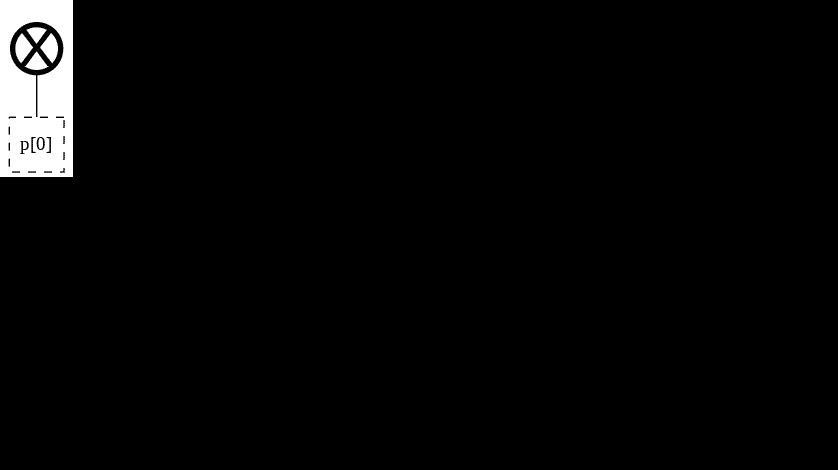

In [ ]:
from pptrees.AdderForest import AdderForest as forest

f = forest(9)
# Sklansky structure is just right-balanced trees
for t in f.trees[2:]:
  t.rbalance(t.root[1])
f

### How many options exist in this base design space?

Traditional hardware addition does not have an answer.

TDE's framework shows the answer:

In [ ]:
from pptrees.util import catalan

width = 9
answer = 1
for a in range(width):
  answer = answer * catalan(a)
print("There are {0} possible structures of width {1}".format(answer,width))

There are 476150875200 possible structures of width 9


### Exploring the base design space of addition hardware

This is an exploration of the traditional base design space.<br>
It is not complete. Each step may require $O(n^{lg\; n})$ time.<br>
It is hard to prove its properties.<br>
![png](https://raw.githubusercontent.com/tdene/synth_opt_adders/main/docs/diagrams/adder_transforms.gif)

This is an exploration of TDE's base design space, shown here for only a single bit of the output for brevity.<br>
Any arbitrary structure can be generated in $O\left(n\;lg(n)\right)$ time.<br>
Each step through the design space requires $O(1)$ time.<br>
As this is just a binary tree, it inherits all related mathematical theory involving properties and proofs thereof.

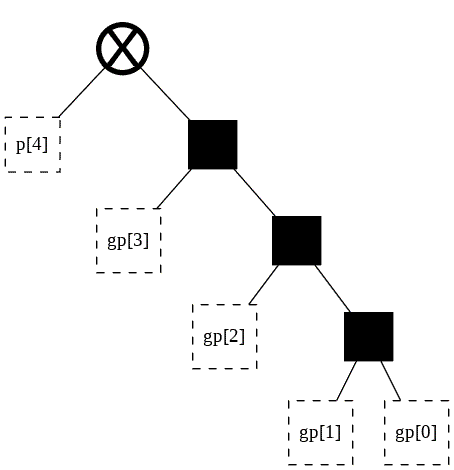

In [ ]:
from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan as catalan
from pptrees.util import display_gif as display_gif
from IPython.display import Image

# Generating trees is fast
# Generating GIFs is VERY slow
# GIFs for width > 5 require viewers to log into their accounts
width = 5

cn = catalan(width-1)
ary = []
for a in range(cn):
  t = tree(width, start_point = a)
  ary.append(t)

Image(display_gif(ary))

### Extending the base design space [Sparseness]

Traditionally, the concept of "sparseness" consists of modifying the post-processing logic in order to allow for multiple bits of the sum to use identical, shared, carry-generation hardware. This can lead to large reductions in area and power consumption.

This is difficult to show in diagrams for simple cases. It is impossible to show for complicated cases.

Sparseness is natural in TDE's framework. It can be applied regularly, irregularly, repeatedly, and/or in a nested fashion.<br>
There are many options, and they all generate HDL automatically and quickly.<br>
The following animations show this. The area of interest is the right side of the tree.

This is an animation, showing the regular computation of bits 4 through 7 of the sum.

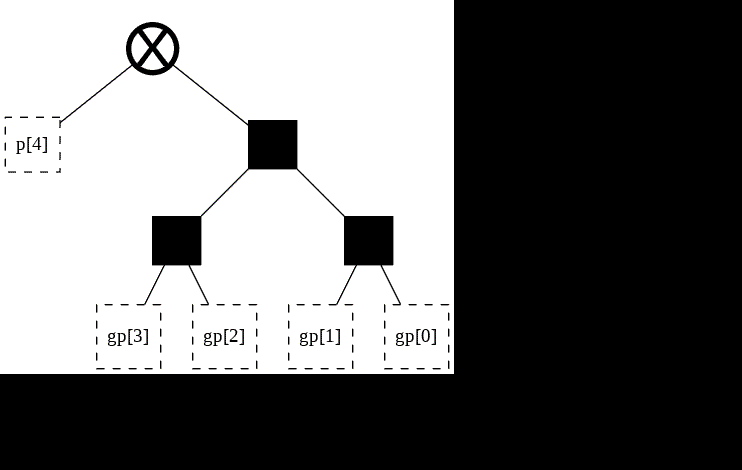

In [ ]:
from pptrees.AdderForest import AdderForest as forest

width = 9
# Start with a complete adder
f = forest(width, tree_start_points = [0, 0, 0, 0, 2, 2, 16, 60, 0, 0])
# Cut out part of the adder to improve the illustration of this point
f.trees = f.trees[4:8]
f

These are bits 4 through 7 with sparseness of degree 1.

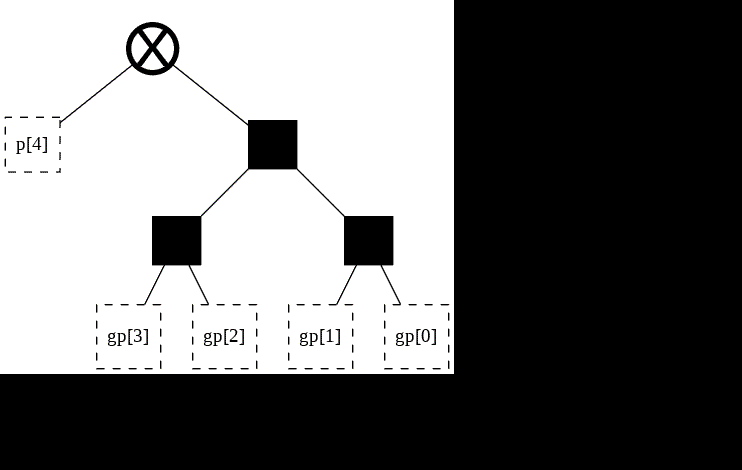

In [ ]:
from pptrees.AdderForest import AdderForest as forest

width = 8
# Start with a complete adder
f = forest(width, tree_start_points = [0, 0, 0, 0, 2, 16, 16, 148])
# Cut out part of the adder to improve the illustration of this point
f.trees = f.trees[4:8]
f

These are bits 4 through 7 with sparseness of a higher degree, such as found in Naffziger’s or Lynch-Swartzlander’s spanning-tree adder.

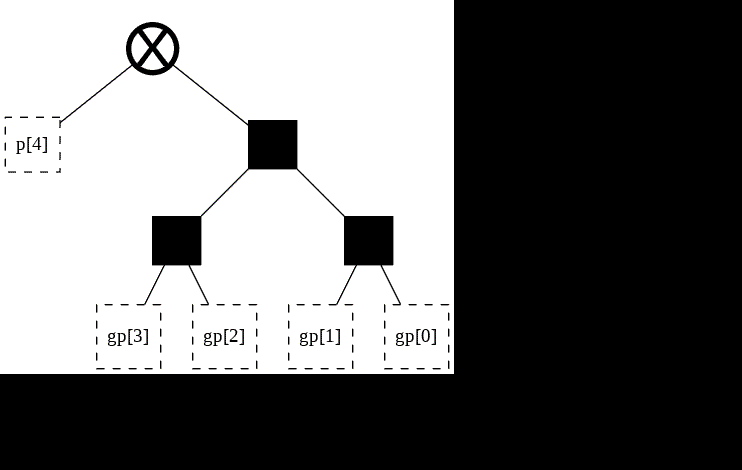

In [ ]:
from pptrees.AdderForest import AdderForest as forest

width = 8
# Start with a complete adder
f = forest(width, tree_start_points = [0, 0, 0, 0, 2, 16, 60, 212])
# Cut out part of the adder to improve the illustration of this point
f.trees = f.trees[4:8]
f

This is bit 7 with nested sparseness, a concept not previously found in literature.

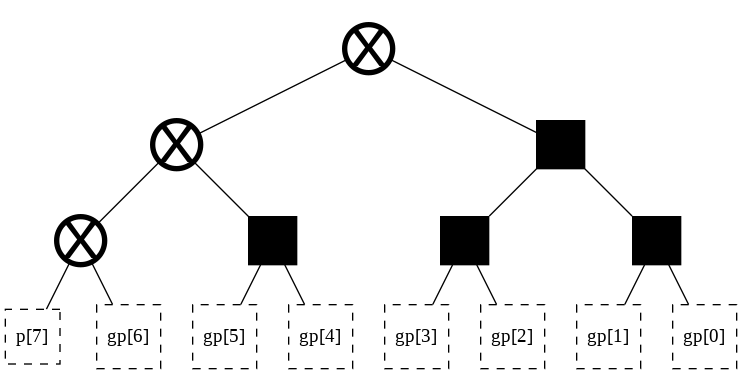

In [ ]:
from pptrees.AdderTree import AdderTree as tree

width = 8
t = tree(width, start_point = 214)
t

### Extending the base design space [Factorization]

Traditional hardware addition utilizes 3-input logic gates in the main body of computation.

Ling pointed out that one 3-input logic gate (slower) may be factored into 2-input logic gates (faster), reducing the circuit's delay at the cost of area and power consumption. Ling's observation may be summed up through the tautology

$g + pg' = (g+p)(g+g')$

On the right side of the above equation, one term remains on the critical path, while the other may be processed in parallel.

Doran exhaustively searches through other such factorizations, concluding that Ling's scheme is the only useful one.

Jackson generalizes Ling's scheme, factoring more than just one single 3-input logic gate. Due to the complexity of Jackson's paper, which introduces multiple new variables and equations, this is seldom used. However, Jackson's observation can be summed up through the simple tautology

$G + PG' = (G + P)(G + G')$

Traditional hardware adder design has no good way of representing this concept, nor of implementing it.

In TDE's framework, such factorization can be expressed naturally as a stereoscopic composition of two related trees.

This is a non-factorized computation for bit 4 of the sum.

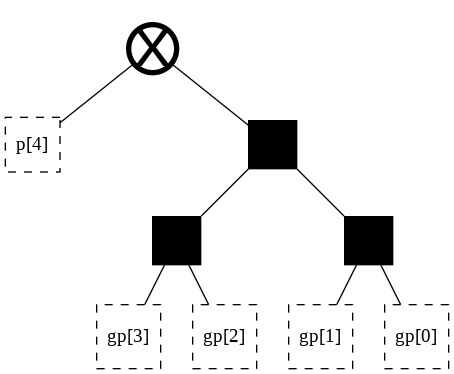

In [ ]:
from pptrees.AdderTree import AdderTree as tree

t = tree(5, start_point = 2)
t

Breaking apart the $gp$ nodes renders two distinct halves, which can be individually manipulated:

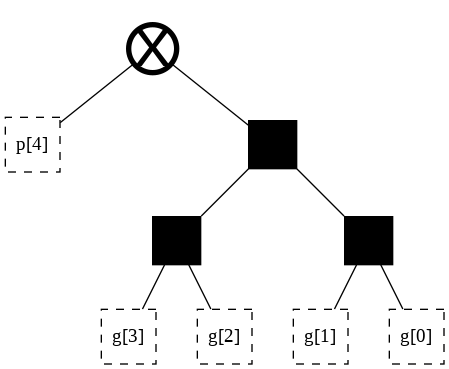

In [ ]:
from pptrees.AdderTree import AdderTree as tree

t = tree(5, start_point = 2, leaf_labels = ["","g","p"])
t

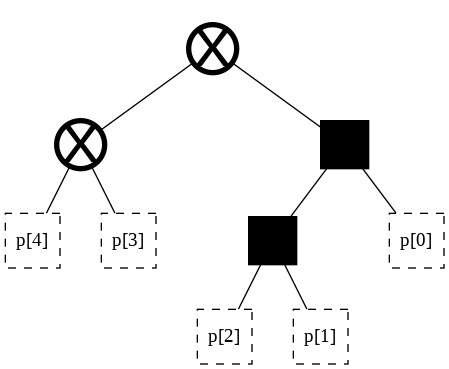

In [ ]:
from pptrees.AdderTree import AdderTree as tree

t = tree(5, start_point = 6, leaf_labels = ["","p","p"])
t

Overlaying these trees on top of each other generates a structure equivalent to Ling's original factorization.<br>
The new architecture is faster, having replaced one 3-input gate delay with a 2-input gate delay, but requires higher area and power consumption.

This approach allows for hardware to implement such factorization simply, efficiently, automatically, and only as needed (in non-regular fashion). Doing so by hand would require weeks, if not months, for a 64-bit adder.

### Extending to other operations

This framework readily applies to all operations with the property that<br>
bit $i$ of the output depends only on bits $j \leq i$ of the input.

For operations where bit $i$ of the output depends on bits $j \geq i$ of the input, such as leading zero detection, it is trivial to apply this framework by just flipping the endianess.

For operations where bit $i$ of the output has no such restriction, such as leading zero anticipation, this framework may yet be applied by splitting the operation into two sequential steps, $O_a : \mathbb{Z}^{i:0}_2 \mapsto \mathbb{Z}^{i}_{2}$ and $O_b : \mathbb{Z}^{n:i}_2 \mapsto \mathbb{Z}^{i}_{2}$.

As mentioned earlier, a predictive recipe currently exists to enable this extension, while a prescriptive recipe may potentially be found through the study of group cohomology.

Example operations that this has been experimentally applied to include:

*   Addition where some input bits are known (addition with sparse inputs, addition by a constant value, etc)
*   Comparison
*   Leading Zero Detection
*   Leading Zero Anticipation
*   "Are the number of zeroes in $a+b$ even or odd?"
*   "Knowing that $a_{7:5} = 001$ and $b_{3:2} = 10$, are the number of zeroes in the more significant half of $a$ divisible by 4 if the sum $a+b$ has at least 5 trailing zeroes and $b$ is non-zero, or alternately are the number of zeroes divisible by 3 if $b$ is zero?"

